In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cross_decomposition import PLSRegression
from scipy.stats import pearsonr
from tqdm import tqdm

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 20)

# Permutation Analyses

In [3]:
df = pd.read_csv('prevent_AD_data_aug_2022.csv', index_col=0)

In [5]:
cols_to_keep = ['CandID',
 'AD8_total_score',
 '1_judgment_problems',
 '2_less_interest',
 '3_repeat',
 '4_trouble_learning_tool',
 '5_forget_month_year',
 '6_trouble_financial_affairs',
 '7_trouble_appointments',
 '8_daily_memory_trouble',
 'APS_score',
 'diagnosed_impairment',
 'hearing_aid',
 'subjective_hearing_impairment',
 'subjective_processing_impairment',
 '500_hz_left',
 '500_hz_right',
 '1000_hz_left',
 '1000_hz_right',
 '4000_hz_left',
 '4000_hz_right',
 'dsi_left',
 'dsi_right',
 'dsi_right_left',
 'worse_ear_dsi',
 'worse_ear_minus10db',
 'Systolic_blood_pressure_x',
 'Diastolic_blood_pressure_x',
 'Pulse_x',
 'Weight_x',
 'tau',
 'ptau',
 'Amyloid_beta_1_42',
 'ApoE',
 'G_CSF',
 'IL_15',
 'IL_8',
 'VEGF',
 'PCSK9',
 'hba1c_value_x',
 'tsh_value_x',
 'b12_value',
 'total_cholesterol_value_x',
 'HDL_value_x',
 'LDL_value_x',
 'Candidate_Age',
 'immediate_memory_index_score',
 'visuospatial_constructional_index_score',
 'language_index_score',
 'attention_index_score',
 'delayed_memory_index_score',
 'total_scale_index_score',
 'story_memory_score',
 'figure_copy_drawing_score',
 'figure_copy_placement_score',
 'figure_copy_total_score',
 'line_orientation_score',
 'picture_naming_score',
 'semantic_fluency_score',
 'digit_span_score',
 'digit_span',
 'coding_score',
 'list_recall_score',
 'list_recognition_score',
 'list_recognition_targets_score',
 'list_recognition_distractors_score',
 'story_recall_score',
 'figure_recall_drawing_score',
 'figure_recall_placement_score',
 'figure_recall_total_score',
 'ccsit_bsit',
 'UPSIT_total_score',              
 'anosmia_diagnosis_Mild Microsmia',
 'anosmia_diagnosis_Moderate Microsmia',
 'anosmia_diagnosis_Normosmia',
 'anosmia_diagnosis_Severe Microsmia',
 'anosmia_diagnosis_Total Anosmia',
 'Education_years',
 'Height',
 'father_dx_ad_dementia',
 'mother_dx_ad_dementia',
 'sibling_dx_ad_dementia',
 'treatment_hypertension',
 'treatment_hyperlipidemia',
 'treatment_diabetes',
 'past_cancer',
 'past_depression',
 'past_osteoporosis',
 'past_migraine',
 'past_asthma',
 'past_atrial_fibrillation',
 'past_arthritis',
 'CDR_total_score',
 'MOCA_total_score',
 'visuospatial_score',
 'naming_score',
 'attention_numbers_score',
 'attention_letters_score',
 'attention_subtractions_score',
 'attention_total_score',
 'language_repeat_score',
 'language_fluency_score',
 'language_total_score',
 'abstraction_score',
 'delayed_recall_score',    
 'orientation_score',
 'Age_baseline_months',
 'probable_MCI_yes',
 'Sex_Female',
 'Sex_Male',
 'Mother_tongue_Arabic',
 'Mother_tongue_English',
 'Mother_tongue_French',
 'Mother_tongue_Italian',
 'Mother_tongue_Other',
 'Mother_tongue_Spanish',
 'Test_language_English',
 'Test_language_French',
 'Ethnicity_african_american',
 'Ethnicity_caucasian',
 'Ethnicity_hispanic',
 'Ethnicity_other',
 'Education_level_collegeclassic',
 'Education_level_highschool',
 'Education_level_postgraduate',
 'Education_level_some_collegeclassic',
 'Education_level_some_highschool',
 'Education_level_some_postgraduate',
 'Education_level_some_undergraduate',
 'Education_level_undergraduate',
 'Retirement_status_no',
 'Retirement_status_semi_retired',
 'Retirement_status_yes',
 'Handedness_interpretation_Ambidextrous',
 'Handedness_interpretation_Left-handed',
 'Handedness_interpretation_Right-handed',
 'BchE_K_variant_AA',
 'BchE_K_variant_AG',
 'BchE_K_variant_GG',
 'BDNF_AA',
 'BDNF_AG',
 'BDNF_GG',
 'HMGCR_Intron_M_AA',
 'HMGCR_Intron_M_GA',
 'HMGCR_Intron_M_GG',
 'TLR4_rs_4986790_AA',
 'TLR4_rs_4986790_AG',
 'PPP2r1A_rs_10406151_CC',
 'PPP2r1A_rs_10406151_CT',
 'PPP2r1A_rs_10406151_TT',
 'CDK5RAP2_rs10984186_AA',
 'CDK5RAP2_rs10984186_GA',
 'CDK5RAP2_rs10984186_GG',
 'APOE',
 'APOE_3 2',
 'APOE_3 3',
 'APOE_4 2',
 'APOE_4 3',
 'APOE_4 4',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',]

In [6]:
phen_df = df[cols_to_keep].drop(columns = [
             'APOE',
             'CandID'])

In [7]:
phen_df = phen_df.rename(columns={
 'AD8_total_score':'Total functional disability',
 '1_judgment_problems':'Judgment problems',
 '2_less_interest':'Lost of interest',
 '3_repeat':'Repeats',
 '4_trouble_learning_tool':'Trouble learning tool',
 '5_forget_month_year':'Forget month/year',
 '6_trouble_financial_affairs':'Trouble with financial affairs',
 '7_trouble_appointments':'Trouble with appointments',
 '8_daily_memory_trouble':'Daily memory trouble',
 'APS_score':'Alzheimer Progression Score',
 'diagnosed_impairment': 'Diagnosed hearing impairment',
 'hearing_aid':'Hearing aid user',
 'subjective_hearing_impairment':'Subjective hearing impairment',
 'subjective_processing_impairment':'Subjective processing impairment',
 '500_hz_left': 'Can hear 500 Hz tone in left ear',
 '500_hz_right': 'Can hear 500 Hz tone in right ear',
 '1000_hz_left' : 'Can hear 1000 Hz tone in left ear',
 '1000_hz_right': 'Can hear 1000 Hz tone in right ear',
 '4000_hz_left': 'Can hear 4000 Hz tone in left ear',
 '4000_hz_right': 'Can hear 4000 Hz tone in right ear',
 'dsi_left':'Left ear score on Dichotic Sentence Identification',
 'dsi_right': 'Right ear score on Dichotic Sentence Identification',
 'dsi_right_left':'Right ear score minus Left ear score of Dichotic Sentence Identification',
 'worse_ear_dsi' : 'Worse ear score on Dichotic Sentence Identification',
 'worse_ear_minus10db': 'Worse ear score on Synthetic Sentence with Ipsilateral Competing Message',
 'Systolic_blood_pressure_x':'Systolic blood pressure',
 'Diastolic_blood_pressure_x':'Diastolic blood pressure',
 'Pulse_x':'Pulse',
 'Weight_x':'Weight',
 'tau':'tau CSF levels',
 'ptau':'ptau CSF levels',
 'Amyloid_beta_1_42':'Amyloid Beta 1-42 CSF levels',
 'ApoE' : 'APOE CSF levels',
 'G_CSF': 'Granulocyte colony-stimulating factor CSF levels',
 'IL_15': 'Interleukin-15 CSF levels',
 'IL_8': 'Interleukin-8 CSF levels',
 'VEGF': 'Vascular endothelial growth factor CSF levels',
 'PCSK9':'PCSK9 CSF levels',
 'hba1c_value_x':'hba1c blood levels',
 'tsh_value_x':'Thyroid stimulating hormone blood level',
 'b12_value':'b12 blood level',
 'total_cholesterol_value_x':'Total cholesterol blood level',
 'HDL_value_x':'High density lipoprotein blood level',
 'LDL_value_x':'Low density lipoprotein blood level',
 'Candidate_Age': 'Age',
 'immediate_memory_index_score' : 'Immediate memory index score',
 'visuospatial_constructional_index_score': 'Visuospatial/constructional index score',
 'language_index_score':'Language index score',
 'attention_index_score':'Attention index score',
 'delayed_memory_index_score':'Delayed memory index score',
 'total_scale_index_score':'Total scale index score',
 'list_learning_total_score':'List learning total score',
 'story_memory_score':'Story memory score',
 'figure_copy_drawing_score':'Figure copy total drawing score',
 'figure_copy_placement_score':'Figure copy total placement score',
 'figure_copy_total_score':'Figure copy total score',
 'line_orientation_score':'Line orientation total score',
 'picture_naming_score':'Picture naming total score',
 'semantic_fluency_score':'Semantic fluency total score',
 'digit_span_score':'Digit span total score',
 'digit_span':'Highest digit span recalled',
 'coding_score':'Coding (symbol to digit) total score',
 'list_recall_score':'List recall total score',
 'list_recognition_score':'List recognition total score',
 'list_recognition_targets_score':'List recognition targets score',
 'list_recognition_distractors_score':'List recognition distractors score',
 'story_recall_score':'Story recall total score',
 'figure_recall_drawing_score' : 'Figure recall total drawing score',
 'figure_recall_placement_score':'Figure recall total placement score',
 'figure_recall_total_score':'Figure recall total score',
 'ccsit_bsit':'Cross-cultural smell identification/brief smell identification test',
 'UPSIT_total_score':'Smell identification test total score',              
 'anosmia_diagnosis_Mild Microsmia' :'Mild microsmia',
 'anosmia_diagnosis_Moderate Microsmia':'Moderate microsmia',
 'anosmia_diagnosis_Normosmia':'Normosmia',
 'anosmia_diagnosis_Severe Microsmia':'Severe microsmia',
 'anosmia_diagnosis_Total Anosmia':'Total anosmia',
 'Education_years':'Education years',
 'father_dx_ad_dementia':'Paternal history of ADRD',
 'mother_dx_ad_dementia':'Maternal history of ADRD',
 'sibling_dx_ad_dementia':'Sibling history of ADRD',
 'treatment_hypertension':'Hypertension',
 'treatment_hyperlipidemia':'Hyperlipidemia',
 'treatment_diabetes':'Diabetes',
 'past_cancer':'Cancer',
 'past_depression':'Depression',
 'past_osteoporosis':'Osteoporosis',
 'past_migraine':'Migraine',
 'past_asthma':'Asthma',
 'past_atrial_fibrillation':'Atrial fibrillation',
 'past_arthritis':'Arthritis',
 'CDR_total_score': 'Clinical dementia rating total score',
 'MOCA_total_score':'Montreal cognitive assessment (MoCA) total score',
 'visuospatial_score' : 'MoCa visuospatial score',
 'naming_score':'MoCa naming score',
 'attention_numbers_score':'MoCa attention numbers score',
 'attention_letters_score':'MoCa attention letters score',
 'attention_subtractions_score':'MoCa subtractions score',
 'attention_total_score':'MoCa attention total score',
 'language_repeat_score':'MoCa language repeat score',
 'language_fluency_score':'MoCa language fluency score',
 'language_total_score':'MoCa language total score',
 'abstraction_score':'MoCa abstraction score',
 'delayed_recall_score':'MoCa delayed recall score', 
 'orientation_score':'MoCa orientation score',
 'Age_baseline_months':'Age at enrollement',
 'probable_MCI_yes':'Probable mild cognitive impairment',
 'Sex_Female':'Female sex',
 'Sex_Male':'Male sex',
 'Mother_tongue_Arabic':'Mother tongue Arabic',
 'Mother_tongue_English':'Mother tongue English',
 'Mother_tongue_French':'Mother tongue French',
 'Mother_tongue_Italian':'Mother tongue Italian',
 'Mother_tongue_Other':'Mother tongue other',
 'Mother_tongue_Spanish':'Mother tongue Spanish',
 'Test_language_English':'Test language English',
 'Test_language_French':'Test language French',
 'Ethnicity_african_american':'African American',
 'Ethnicity_caucasian':'Caucasian',
 'Ethnicity_hispanic':'Hispanic',
 'Ethnicity_other':'Other ethnicity',
 'Education_level_collegeclassic':'College education',
 'Education_level_highschool':'High school education',
 'Education_level_postgraduate':'Postgraduate education',
 'Education_level_some_collegeclassic':'Some college education',
 'Education_level_some_highschool':'Some high school education',
 'Education_level_some_postgraduate':'Some postgraduate education',
 'Education_level_some_undergraduate':'Some undergraduate education',
 'Education_level_undergraduate':'Undergraduate education',
 'Retirement_status_no':'Not retired',
 'Retirement_status_semi_retired':'Semi-retired',
 'Retirement_status_yes':'Retired',
 'Handedness_interpretation_Ambidextrous':'Ambidextrous',
 'Handedness_interpretation_Left-handed':'Left-handed',
 'Handedness_interpretation_Right-handed':'Right-handed',
 'APOE_3 2':'APOE e3/2',
 'APOE_3 3':'APOE e3/3',
 'APOE_4 2':'APOE e4/2',
 'APOE_4 3':'APOE e4/3',
 'APOE_4 4':'APOE e4/4'})

In [8]:
df[cols_to_keep].shape

(799, 209)

In [9]:
apoe = df.APOE

In [10]:
cca_cols = cols_to_keep[-50:]

In [11]:
id_32 = np.where(df['APOE_3 2']==1)
id_33 = np.where(df['APOE_3 3']==1)
id_42 = np.where(df['APOE_4 2']==1)
id_43 = np.where(df['APOE_4 3']==1)
id_44 = np.where(df['APOE_4 4']==1)

# Cross-correlation

In [12]:
new_cols = []
for i in range(1,26):
    new_cols.append(f'HC_{i}')
for i in range(1,26):
    new_cols.append(f'DN_{i}')

In [13]:
all_time_points_num = phen_df

In [14]:
scaler = StandardScaler()
z_all_time_points_num = scaler.fit_transform(all_time_points_num)
z_all_time_points_num.shape

(799, 207)

In [15]:
np.corrcoef(all_time_points_num.T)

array([[ 1.        ,  0.43485722,  0.45102565, ..., -0.05066225,
         0.01974515, -0.06010251],
       [ 0.43485722,  1.        ,  0.13153264, ...,  0.03958033,
         0.02853012,  0.05246088],
       [ 0.45102565,  0.13153264,  1.        , ..., -0.04867853,
         0.00687208, -0.0276172 ],
       ...,
       [-0.05066225,  0.03958033, -0.04867853, ...,  1.        ,
        -0.01255578, -0.00347966],
       [ 0.01974515,  0.02853012,  0.00687208, ..., -0.01255578,
         1.        ,  0.01071003],
       [-0.06010251,  0.05246088, -0.0276172 , ..., -0.00347966,
         0.01071003,  1.        ]])

In [16]:
cols = phen_df.columns

In [ ]:
figure(figsize=(20, 50), dpi=200)

sns.heatmap(np.corrcoef(all_time_points_num.T)[:-50,-50:], cmap=plt.cm.RdBu_r, center=0, vmax = 0.50, vmin=-0.50, xticklabels = new_cols, yticklabels = phen_df.columns[:-50], cbar_kws={"shrink": 0.5})
plt.title('Cross-correlation plot for all participants at all time points', fontsize=20)
plt.savefig('08.23.22/cross_corr_all.png', dpi=200, bbox_inches='tight')
plt.show()

In [20]:
def permutation(original,tag):

    all_rand_corrs = []
    table = pd.DataFrame(columns=cols)
    index = []
    
    #performing 1000 bootstrap iterations
    for i in tqdm(range(0,1000)):

        #shuffling original data matrix
        rng = np.random.default_rng(i)
        shuffled = rng.permutation(original)
        
        #z-coring
        scaler = StandardScaler()
        z_original = scaler.fit_transform(original)

        scaler = StandardScaler()
        z_shuffled = scaler.fit_transform(shuffled)

        #getting Pearson's correlation coefficients between original data and shuffled data
        corr = np.corrcoef(z_shuffled.T, z_original.T)

        #keeping only the coefficients between original data and shuffled data
        rand_corr = corr[207:,0:207]

        coef = pd.DataFrame(rand_corr, columns = cols) 
        table = table.append(coef)

    #setting new indices 
    for i in range(0,1000):
        for col in cols:
            index.append(col+f'_{i}')

    table['index'] = index
    table = table.set_index('index', drop=True)
    table.to_csv(f'cross-corr_perm_{tag}.csv')
    
    #original cross-correlation matrix
    cross_corr = np.corrcoef(z_original.T)
    dict_pval = {}
    for i in tqdm(range(0,207)):
        for j in range(0,207):
            
            #building null distribution
            null_dist = table.iloc[i::207][cols[j]]
            
            #two-tailed test
            point = cross_corr[i,j]
            if point < 0: 
                bigger = null_dist[null_dist<point]
                #print(f'Number of values above criterion: {bigger.shape[0]}')
                p_val = bigger.shape[0]/1000
                #print(f'P-value: {p_val}')
            else: 
                bigger = null_dist[null_dist>point]
                #print(f'Number of values above criterion: {bigger.shape[0]}')
                p_val = bigger.shape[0]/1000
                #print(f'P-value: {p_val}')
            key = f'{cols[i]}_{cols[j]}'
            dict_pval[key] = p_val
            
    #saving results       
    p_val = pd.DataFrame()
    coefs = []
    pval = []
    for i in dict_pval.items():
        coefs = np.append(coefs,i[0])
        pval = np.append(pval,i[1])
    p_val['coefs'] = coefs
    p_val['pval'] = pval
    p_val.to_csv(f'cross-corr_perm_{tag}_pval_08.29.22.csv')
    
    
    pvals = np.array(p_val.pval).reshape(207,207)
    
    #using pvals to create mask
    #mask values above a certain threshold
    #two-tailed so split threshold by 2
    mask = np.ma.masked_where(pvals>0.025, cross_corr)

    return table, p_val, mask 

In [21]:
perm_coefs, perm_p_vals, mask = permutation(np.array(all_time_points_num), 'all')

100%|█████████████████████████████████████████| 207/207 [00:12<00:00, 16.03it/s]


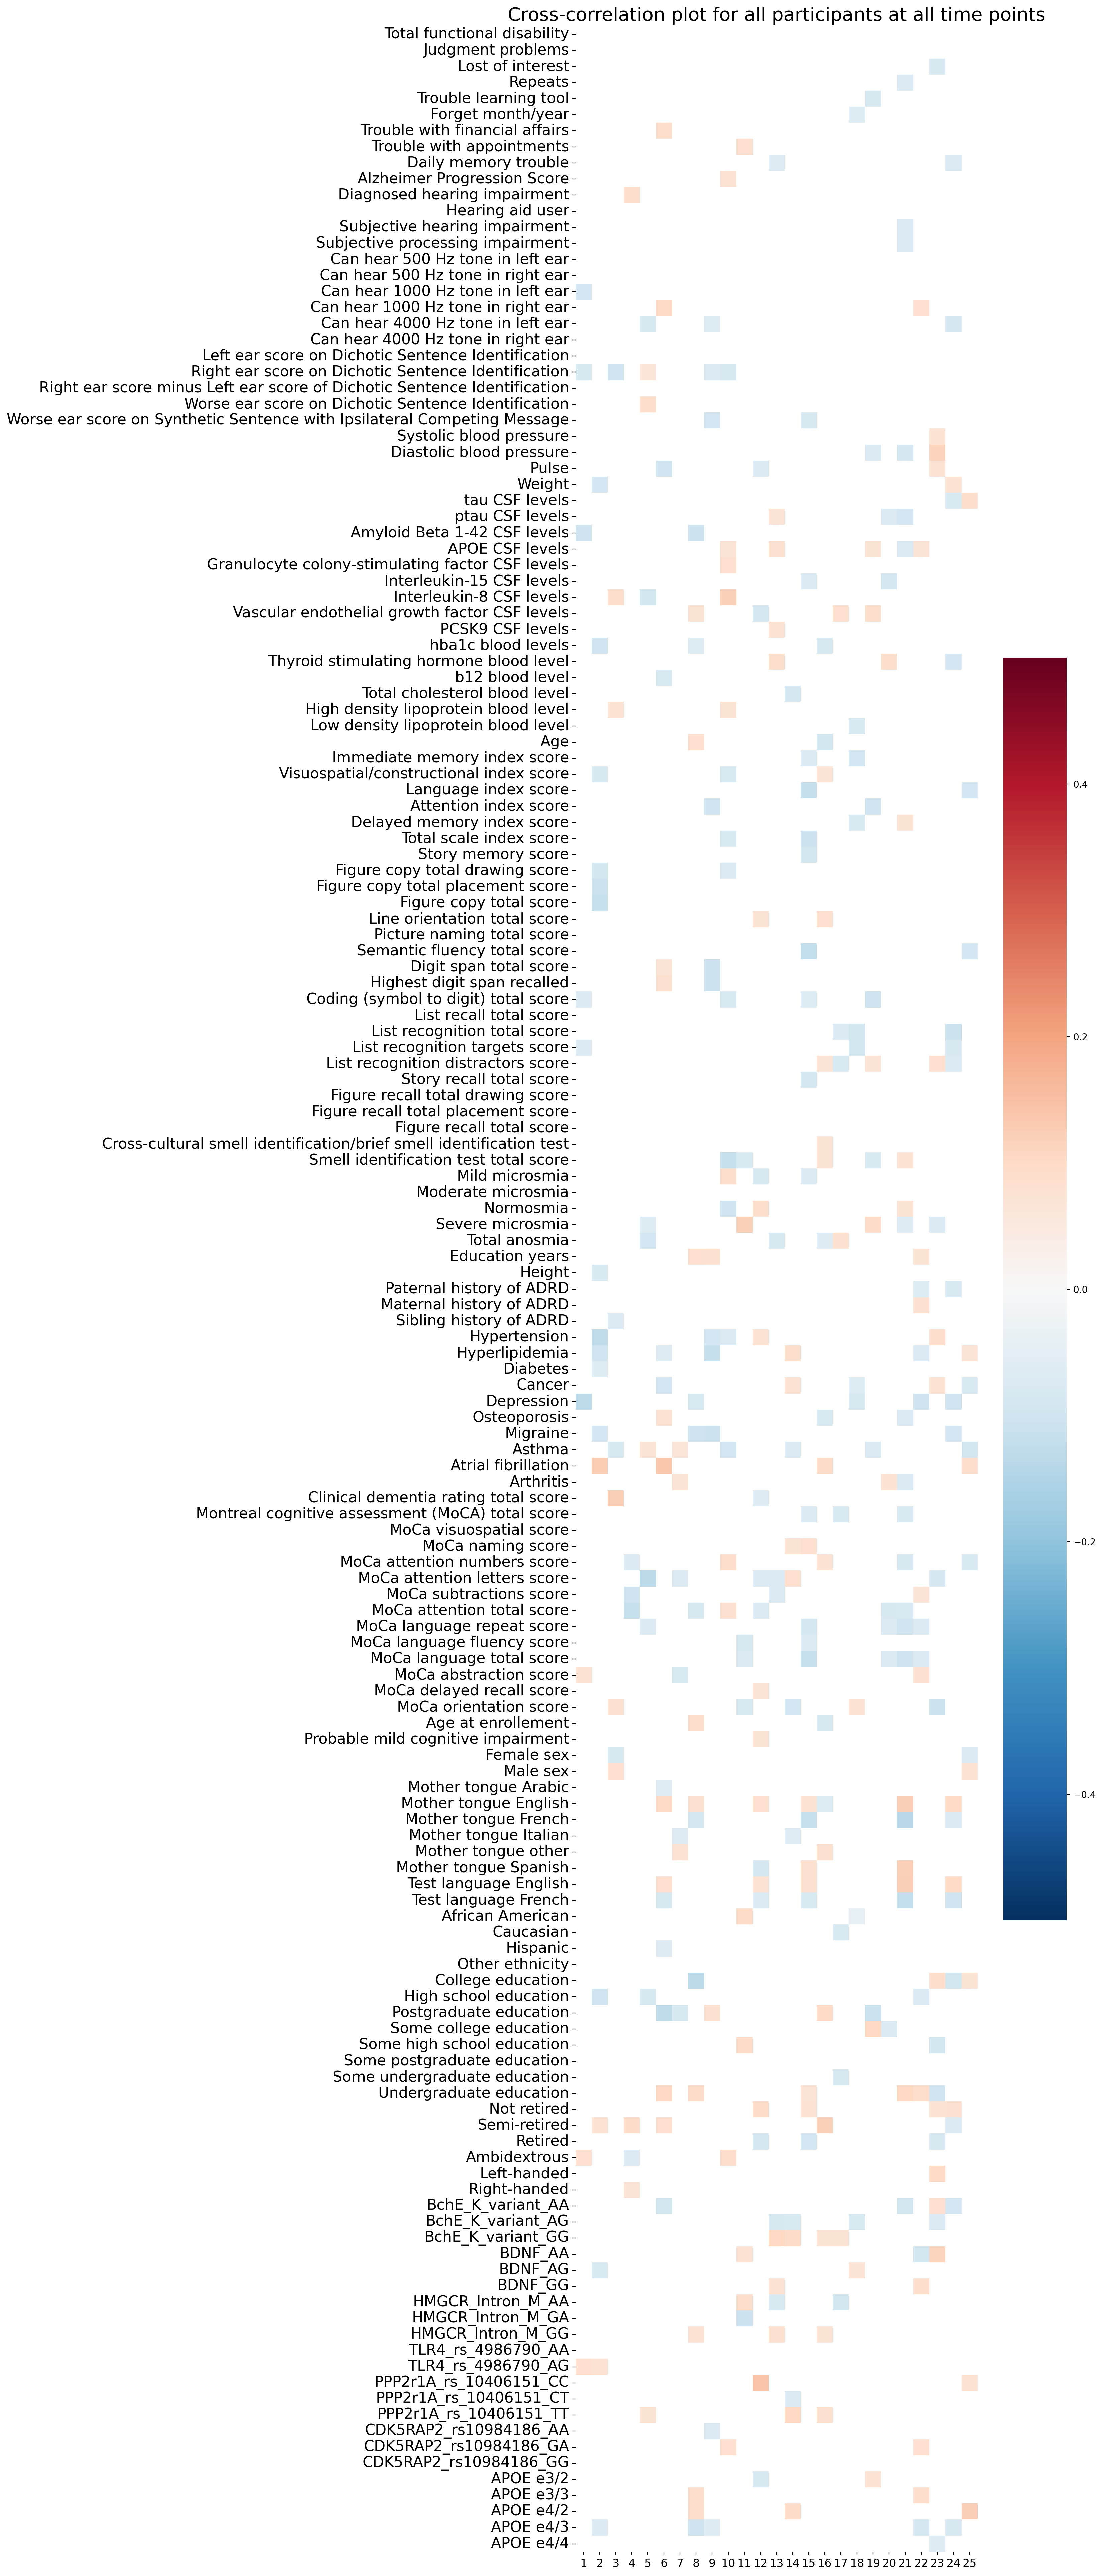

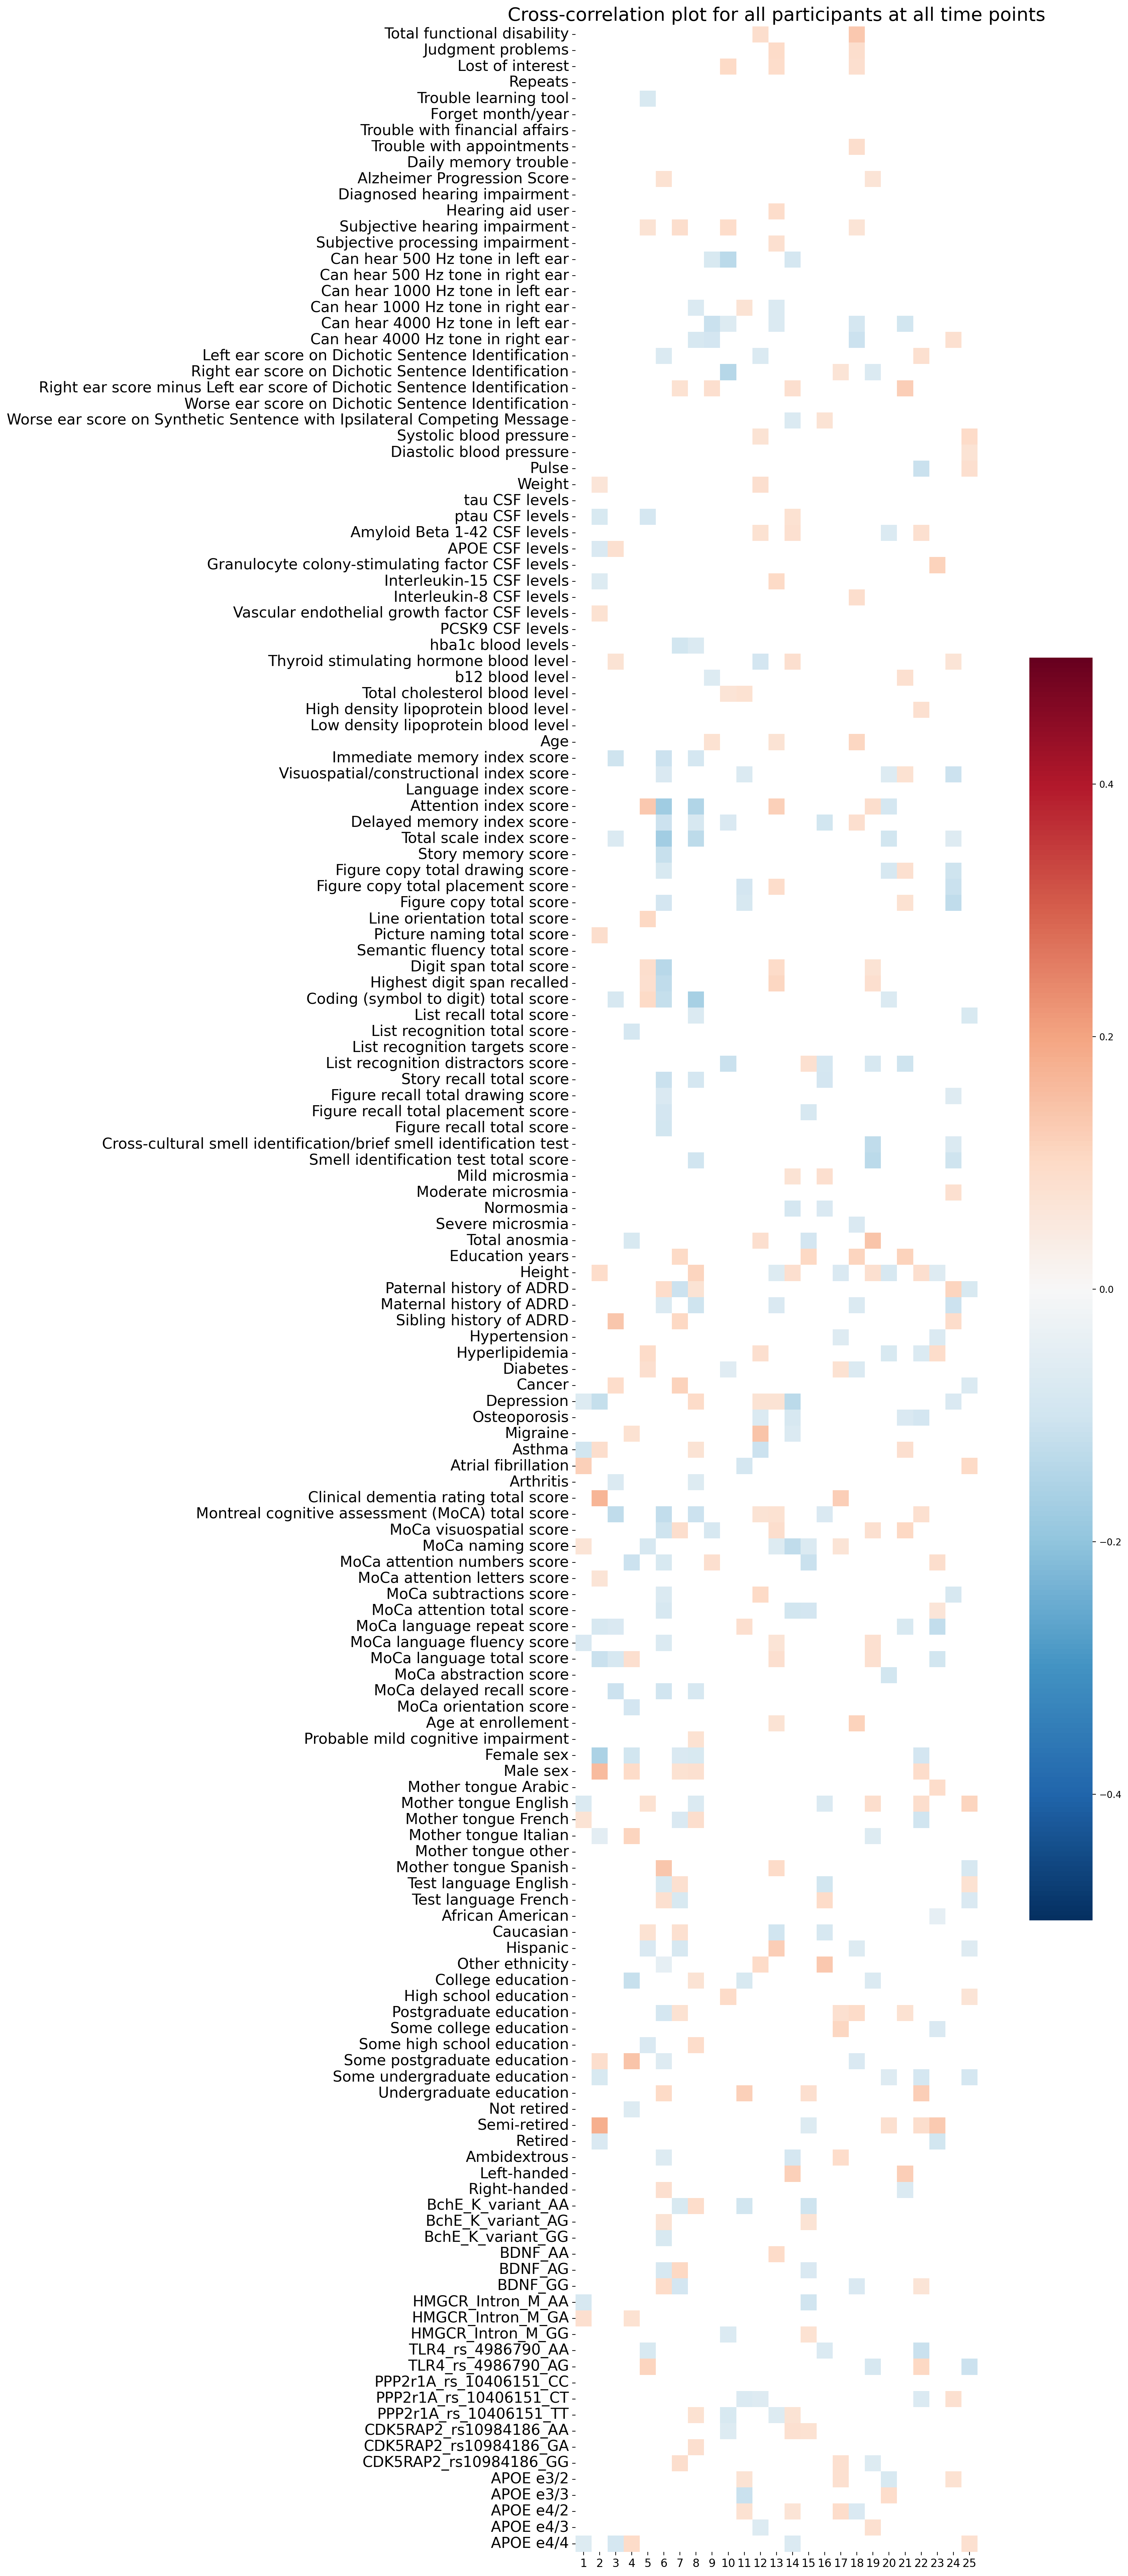

In [34]:
mask_df = pd.DataFrame(mask)

#plot masked cross-correlation data 
figure(figsize=(10, 50), dpi=200)
sns.heatmap(mask_df.iloc[:-50,-50:-25], square = True, cmap=plt.cm.RdBu_r, center=0, vmax = 0.50, vmin=-0.50, xticklabels = range(1,26), yticklabels = phen_df.columns[:-50],cbar_kws={"shrink": 0.5})
plt.yticks(fontsize=16)
plt.xticks(fontsize=12)
plt.title('Cross-correlation plot for all participants at all time points', fontsize=20)
plt.savefig('08.29.22/cross_corr_all_masked_hc.png', dpi=200, bbox_inches='tight')
plt.show()

#plot masked cross-correlation data 
figure(figsize=(20, 50), dpi=200)
sns.heatmap(mask_df.iloc[:-50,-25:], square = True, cmap=plt.cm.RdBu_r, center=0, vmax = 0.50, vmin=-0.50, xticklabels = range(1,26), yticklabels = phen_df.columns[:-50],cbar_kws={"shrink": 0.5})
plt.yticks(fontsize=16)
plt.xticks(fontsize=12)
plt.title('Cross-correlation plot for all participants at all time points', fontsize=20)
plt.savefig('08.29.22/cross_corr_all_masked_dn.png', dpi=200, bbox_inches='tight')
plt.show()